In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import seaborn as sns
import swifter
from thefuzz import fuzz
from thefuzz import process
plt.style.use('ggplot')

C:\Users\Vinicius\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
#CARREGANDO DATASETS IMPORTANTES PARA AS ANÁLISES
df = pd.read_csv("https://raw.githubusercontent.com/FerriVinicius/Projeto-E/refs/heads/main/PRESCRIPTIONS.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/FerriVinicius/Projeto-E/refs/heads/main/ADMISSIONS.csv")

In [ ]:
#CHECANDO AS COLUNAS PRESENTES NO DATASET PRINCIPAL
for col in df.columns:
    print(f'"{col}"')

"subject_id"
"hadm_id"
"drug"
"drug_name_poe"
"drug_name_generic"
"formulary_drug_cd"
"gsn"
"ndc"


In [ ]:
#FILTRANDO AS COLUNAS IMPORTANTES PARA ANÁLISES
df = df[[#'row_id',
            'subject_id',
            'hadm_id', #'icustay_id',
            #'startdate', 'enddate',
            #'drug_type',
            'drug', 'drug_name_poe', 'drug_name_generic',
            'formulary_drug_cd',
            'gsn', 'ndc',
            #'prod_strength', 'dose_val_rx',
            #'dose_unit_rx', 'form_val_disp', 'form_unit_disp',
            #'route'
            ]].copy()

df2 = df2[[#'row_id',
            'subject_id', #'hadm_id', #'admittime', 'dischtime',
            'deathtime', #'admission_type', #'admission_location',
            #'discharge_location', 'insurance', 'language', 'religion',
            #'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
            #'hospital_expire_flag', 'has_chartevents_data'
            ]].copy()

In [ ]:
print(df.columns)


Index(['subject_id', 'hadm_id', 'drug', 'drug_name_poe', 'drug_name_generic',
       'formulary_drug_cd', 'gsn', 'ndc'],
      dtype='object')


In [ ]:
#RENOMEANDO COLUNAS PARA MELHOR VISUALIZAÇÃO
df = df.rename(columns={'subject_id':"ID_Patient",
                            'hadm_id':'ID_medical_record',
                            'drug':'Popular_drug_name',
                            'drug_name_poe':'Commercial_drug_name',
                            'drug_name_generic':'Generic_drug_name',
                            'formulary_drug_cd':'Drug_code',
                            'gsn':'gsn',
                            'ndc':'ndc'
                            })

<Axes: ylabel='formulary_drug_cd'>

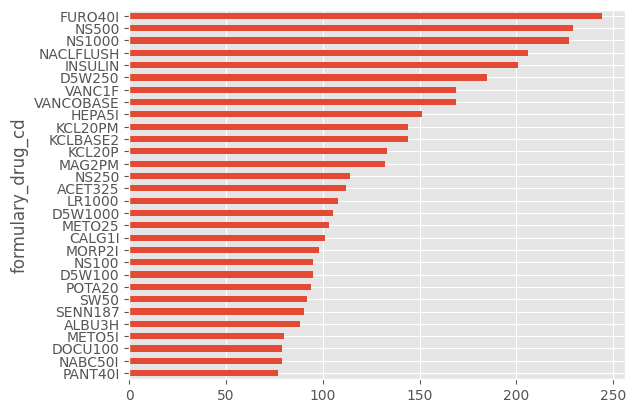

In [ ]:
#30 DROGAS MAIS PRESCRITAS
df["formulary_drug_cd"].value_counts().head(30).sort_values().plot(kind="barh", )


In [ ]:
#VISUALIZANDO OS DIFERENTES CODIGOS INTERNOS PARA DIFERENTES DROGAS
df["Drug_code"].unique()

#or:

#Drugs = [ ]
#for code in df["Drug_code"]:
#    if code not in Drugs:
#        Drugs.append(code)
#print(Drugs)

array(['PNEU25I', 'BISA5', 'BISA10R', 'SENN187', 'DOCU100L', 'HEPA5I',
       'SIMV10', 'ASA81', 'DONE5', 'GABA100', 'MEMA5', 'TOLT1', 'TOPR25',
       'TAMS.4', 'DOCU100', 'NACLFLUSH', 'GUAI10', 'ALBU17H', 'AMLO5',
       'FINA5', 'LEVO75', 'TIOT', 'ASA325', 'ZITHR250', 'PRED20',
       'SODI65S', 'HEPA10SYR', 'MVI', 'FERR325', 'IPRA2H', 'ALBU3H',
       'SERT100', 'SIMV40', 'LEVO100', 'ALLO100', 'PANT40', 'FURO40I',
       'CARV3125', 'METO25', 'METO5I', 'LACT30L', 'RIFA200', 'FENT2.550',
       'MIDA100', 'PROP100IG', 'ATRO1I', 'CHLO15L', 'IPRAPF',
       'PROAIR8.5H', 'MORP2I', 'NS451000', 'VIAL', 'NS500', 'VANCOBASE',
       'NS/MBP100I', 'METRBASE', 'D5W100', 'D5W250', 'NS1000', 'MORPD5W',
       'PANT40I', 'VANC1F', 'CEFE2I', 'METR500PM', 'CEFE1I', 'FURO100I',
       'LEVO4I', 'MORP100PM', 'PERC', 'PARO10', 'ASCO500', 'CREO10',
       'ACET325', 'ONDAN4I', 'DIPH25', 'CIPR500', 'GLYC17', 'MAG2PM',
       'NEUT', 'MORP15', 'ACET20/4I', 'MORP30', 'MORP4I', 'ALBU25',
       'VALS160

In [ ]:
#PACIENTES COM MULTIPLAS PRESCRIÇÕES (EM TODAS AS INTERNAÇÕES)

prescription_counts = df.groupby('ID_Patient').size().sort_values().reset_index(name='prescription_count')
multiple_prescriptions = prescription_counts[prescription_counts['prescription_count'] > 1]
print(multiple_prescriptions)

    ID_Patient  prescription_count
0        10064                  15
1        42458                  15
2        44222                  19
3        42033                  20
4        42275                  20
..         ...                 ...
89       10061                 314
90       10124                 315
91       10126                 437
92       40310                 893
93       41976                1158

[94 rows x 2 columns]


In [ ]:
#INTERNAÇÕES COM MULTIPLAS PRESCRIÇÕES (DUAS OU MAIS PODEM PERTENCER AO MESMO PACIENTE)

prescription_counts = df.groupby('ID_medical_record').size().sort_values().reset_index(name='prescription_count')
multiple_prescriptions = prescription_counts[prescription_counts['prescription_count'] > 1]
print(multiple_prescriptions)

     ID_medical_record  prescription_count
0               175880                  12
1               111761                  15
2               159647                  15
3               131048                  18
4               192189                  19
..                 ...                 ...
117             170883                 244
118             139932                 279
119             145203                 314
120             160445                 437
121             186361                 784

[122 rows x 2 columns]


In [ ]:
#RELAÇÃO DE PACIENTES, ADMISSÕES E QUANTIDADE DE PRESCRIÇÕES MÉDICAS

admissions_per_patient = df.groupby('ID_Patient')['ID_medical_record'].nunique()
admissions_per_patient.columns = ['ID_Patient', 'Admissions_count']
prescriptions_per_patient = df.groupby('ID_Patient').size().reset_index(name='Prescriptions_count')
#patient_info = pd.merge(admissions_per_patient, prescriptions_per_patient, on='ID_Patient').sort_values(by='Admissions_count', ascending=False)
patients_admission_info = pd.merge(admissions_per_patient, prescriptions_per_patient, on='ID_Patient').sort_values(by='Prescriptions_count', ascending=False)
print(patients_admission_info)

    ID_Patient  ID_medical_record  Prescriptions_count
60       41976                 15                 1158
50       40310                  2                  893
41       10126                  1                  437
40       10124                  2                  315
19       10061                  1                  314
..         ...                ...                  ...
62       42033                  1                   20
68       42275                  1                   20
92       44222                  1                   19
20       10064                  1                   15
77       42458                  1                   15

[94 rows x 3 columns]


In [ ]:
#QUANTIDADE DE FARMACOS DIFERENTES ADMINISTRADOS POR PACIENTE (USANDO CÓDIGO NDC DAS DROGAS)

dif_drugs_per_patient = df.groupby('ID_Patient')['ndc'].nunique()
dif_drugs_per_patient = dif_drugs_per_patient.reset_index(name='Dif_drugs_count')
patients_info = pd.merge(patients_admission_info, dif_drugs_per_patient, on="ID_Patient").sort_values(by='Prescriptions_count', ascending=False)
print(patients_info)

    ID_Patient  ID_medical_record  Prescriptions_count  Dif_drugs_count
0        41976                 15                 1158              196
1        40310                  2                  893              197
2        10126                  1                  437               86
3        10124                  2                  315              103
4        10061                  1                  314               87
..         ...                ...                  ...              ...
89       42033                  1                   20               15
90       42275                  1                   20               16
91       44222                  1                   19               17
92       10064                  1                   15               10
93       42458                  1                   15               15

[94 rows x 4 columns]


In [ ]:
#QUANTIDADE DE FARMACOS DIFERENTES ADMINISTRADOS POR PACIENTE (USANDO O NOME POPULAR DAS DROGAS)

dif_drugs_per_patient = df.groupby('ID_Patient')['Popular_drug_name'].nunique()
dif_drugs_per_patient = dif_drugs_per_patient.reset_index(name='Dif_drugs_count')
patients_info = pd.merge(patients_admission_info, dif_drugs_per_patient, on="ID_Patient").sort_values(by='Prescriptions_count', ascending=False)
print(patients_info)

    ID_Patient  ID_medical_record  Prescriptions_count  Dif_drugs_count
0        41976                 15                 1158              141
1        40310                  2                  893              148
2        10126                  1                  437               75
3        10124                  2                  315               87
4        10061                  1                  314               69
..         ...                ...                  ...              ...
89       42033                  1                   20               14
90       42275                  1                   20               16
91       44222                  1                   19               15
92       10064                  1                   15                9
93       42458                  1                   15               14

[94 rows x 4 columns]


FORTE INCONSISTENCIA ENTRE OS DADOS DE NOME E CÓDIGO DE DROGAS (ALÉM DE ERRO HUMANO: CODIGOS DIFERENTES PARA DOSAGENS, VIA DE ADMINISTRAÇÃO, ETC.)
SERÁ NECESSÁRIO MÉTODO ALTENARTIVO PARA MAIOR CONFIABILIDADE NA QUANTIZAÇÃO DE DROGAS DISTINTAS PRESCRITAS A CADA PACIENTE, ENTÃO REINICIALIZANDO NOSSO DATASET PARA MENORES INTERFERENCIAS.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/FerriVinicius/Projeto-E/refs/heads/main/PRESCRIPTIONS.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/FerriVinicius/Projeto-E/refs/heads/main/ADMISSIONS.csv")

#FILTRANDO AS COLUNAS IMPORTANTES PARA ANÁLISES
df = df[[#'row_id',
            'subject_id',
            'hadm_id', 'icustay_id',
            #'startdate', 'enddate',
            #'drug_type',
            'drug', 'drug_name_poe', 'drug_name_generic',
            'formulary_drug_cd',
            'gsn', 'ndc',
            #'prod_strength', 'dose_val_rx',
            #'dose_unit_rx', 'form_val_disp', 'form_unit_disp',
            #'route'
            ]].copy()

df2 = df2[[#'row_id',
            'subject_id', #'hadm_id', #'admittime', 'dischtime',
            'deathtime', #'admission_type', #'admission_location',
            #'discharge_location', 'insurance', 'language', 'religion',
            #'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
            #'hospital_expire_flag', 'has_chartevents_data'
            ]].copy()


In [ ]:
##CRIANDO UM DICIONÁRIO QUE IRÁ ARMAZENAR CADA PACIENTE, SUAS INTERNAÇÕES E DROGAS PRESCRITAS
patients_dict = {}

for index, row in df.iterrows():
    subject_id = row['subject_id']
    hadm_id = row['hadm_id']

    #TUPLA PARA TODAS AS VARIAVEIS DE DROGAS DISPONIVEIS NO DATASET
    drug_info = (
        row['drug'],
        row['drug_name_poe'],
        row['drug_name_generic'],
        row['formulary_drug_cd'],
        row['gsn'],
        row['ndc']
    )

    #ADICIONAR SOMENTE VALORES NÃO NULOS A TUPLA
    drug_info = tuple(filter(lambda x: x not in [None, ''], drug_info))

    #CONDICIONAL QUE SÓ IRÁ CONSIDERAR LINHAS COM ENTRADAS VÁLIDAS
    if len(drug_info) > 0:
        if subject_id not in patients_dict:
            patients_dict[subject_id] = {}

        if hadm_id not in patients_dict[subject_id]:
            patients_dict[subject_id][hadm_id] = []

        #ADICIONA A INFORMAÇÃO DE DROGAS PRESCRITAS A CADA ADMISSÃO
        patients_dict[subject_id][hadm_id].append(drug_info)

In [ ]:
#FUNÇÃO PARA CHECAR SE A DROGA JÁ ESTÁ PRESENTE NA LISTA DE DROGAS PARA CADA INTERNAÇÃO

def is_duplicate(drug, unique_drugs):
    for unique_drug in unique_drugs:
        if any(d == u for d, u in zip(drug, unique_drug)):
            return True
    return False


In [ ]:
#LISTA PARA ARMAZENAMENTO DE LINHAS DO NOVO DATASET CONTENDO ENTRADAS UNICAS DE DROGAS
patient_data = []

#LOOP ATRAVÉS DO DICIONÁRIO DE PACIENTES PARA CALCULO DE DROGAS PRESCRITAS DISTINTAS
for subject_id, admissions in patients_dict.items():
    unique_drugs = []

    for hadm_id, drugs in admissions.items():
        for drug in drugs:
            filtered_drug = tuple(filter(lambda x: x not in [None, ''], drug))
            if len(filtered_drug) > 0 and not is_duplicate(filtered_drug, unique_drugs):
                unique_drugs.append(filtered_drug)

    #ADICIONA UMA LINHA A CADA PACIENTE E ADICIONA +1 A CONTAGEM DE DROGAS DISTINTAS
    patient_data.append({'subject_id': subject_id, 'distinct_drug_count': len(unique_drugs)})

#CRIA UM NOVO DATAFRAME CONTENDO PACIENTES E QUANTIDADE DE DROGAS DISTINTAS PRECRITAS
df3 = pd.DataFrame(patient_data)

In [ ]:
df2 = df2.rename(columns={'subject_id':"ID_Patient"})
df3 = df3.rename(columns={'subject_id':"ID_Patient"})

In [ ]:
dist_drugs = pd.merge(df3, patients_admission_info, on="ID_Patient").sort_values(by='distinct_drug_count', ascending=False)
dist_drugs['alive'] = df2['deathtime'].isnull()
dist_drugs['ICU_stay'] = df['icustay_id'].isnull()
dist_drugs



,ID_Patient,distinct_drug_count,ID_medical_record,Prescriptions_count,alive,ICU_stay
84,40310,130,2,893,True,False
74,41976,122,15,1158,True,True
17,10124,80,2,315,False,False
29,10045,66,1,209,True,False
39,10061,62,1,314,False,True
...,...,...,...,...,...,...
0,42458,14,1,15,True,True
54,10089,14,1,29,True,False
5,42033,14,1,20,True,True
10,43879,13,1,31,True,True


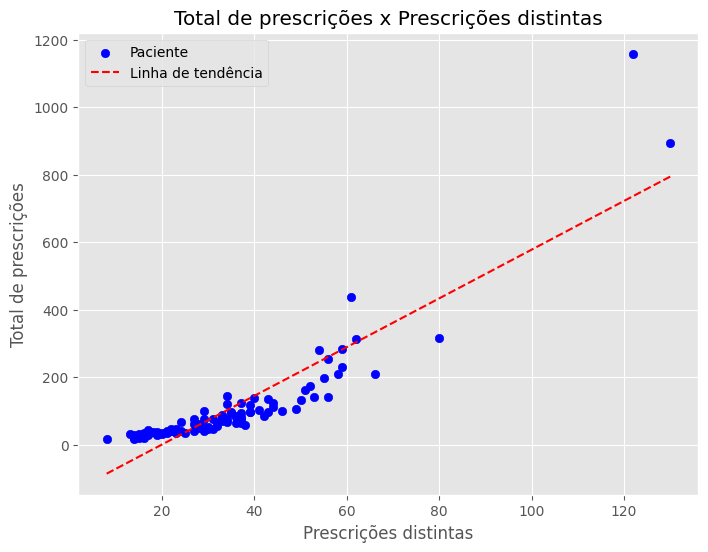

In [ ]:
#SCATTERPLOT
plt.figure(figsize=(8, 6))
plt.scatter(dist_drugs['distinct_drug_count'], dist_drugs['Prescriptions_count'], color='blue', label='Paciente')
z = np.polyfit(dist_drugs['distinct_drug_count'], dist_drugs['Prescriptions_count'], 1)
p = np.poly1d(z)
plt.plot(dist_drugs['distinct_drug_count'], p(dist_drugs['distinct_drug_count']), "r--", label='Linha de tendência')
plt.xlabel('Prescrições distintas')
plt.ylabel('Total de prescrições')
plt.title('Total de prescrições x Prescrições distintas')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#LISTA COM EXCIPIENTES FARMACEUTICOS COMUNS QUE OPTAMOS POR IGNORAR DURANTE AS ANÁLISES PARA TORNAR O PROCESSO COMPUTACIONAL MAIS RÁPIDO
stopwords = ['Chloride', 'Sodium', 'Hydrochloride', 'Potassium', 'Magnesium', 'Calcium', 'Sulfate', 'Phosphate', 'Carbonate', 'Bicarbonate']

#FUNÇÃO PARA REMOVER AS STOPWORDS DEFINIDAS E CONVERSÃO PARA LETRAS MAIUSCULAS
def remove_stopwords_and_uppercase(drug_name, stopwords):
    drug_name_parts = drug_name.split()
    filtered_parts = [word.upper() for word in drug_name_parts if word not in stopwords]
    return ' '.join(filtered_parts)

#CARREGANDO OS DATASETS QUE SERÃO UTILIZADOS
df_prescriptions = pd.read_csv('https://raw.githubusercontent.com/FerriVinicius/Projeto-E/refs/heads/main/PRESCRIPTIONS.csv')
df_interactions = pd.read_csv('https://raw.githubusercontent.com/Prahlad-Narayan/DDI/refs/heads/main/backend/DDI_data.csv')

#FILTRANDO AS COLUNAS QUE SERÃO UTILIZADAS
df_prescriptions_cleaned = df_prescriptions[['subject_id', 'hadm_id', 'drug', 'drug_name_generic', 'gsn', 'ndc']]
df_interactions_cleaned = df_interactions[['drug1_name', 'drug2_name', 'interaction_type']]

#VERIFICANDO SE TODAS AS COLUNAS COM NOMES DE DROGAS SÃO STRINGS E PREENCHENDO ENTRADAS NaN EM
df_prescriptions_cleaned['drug'] = df_prescriptions_cleaned['drug'].fillna('').astype(str)
df_prescriptions_cleaned['drug_name_generic'] = df_prescriptions_cleaned['drug_name_generic'].fillna('').astype(str)
df_interactions_cleaned['drug1_name'] = df_interactions_cleaned['drug1_name'].fillna('').astype(str)
df_interactions_cleaned['drug2_name'] = df_interactions_cleaned['drug2_name'].fillna('').astype(str)

#PROCESSANDO OS NOMES DAS DROGAS EM AMBOS OS DATASETS UTILIZANDO A BIBLIOTECA Swifter PARA PARALELISMO, TORNANDO O PROCESSO COMPUTACIONALMENTE MAIS RÁPIDO
df_prescriptions_cleaned['cleaned_drug'] = df_prescriptions_cleaned['drug'].swifter.apply(lambda x: remove_stopwords_and_uppercase(x, stopwords))
df_prescriptions_cleaned['cleaned_drug_name_generic'] = df_prescriptions_cleaned['drug_name_generic'].swifter.apply(lambda x: remove_stopwords_and_uppercase(x, stopwords))
df_interactions_cleaned['cleaned_drug1_name'] = df_interactions_cleaned['drug1_name'].swifter.apply(lambda x: remove_stopwords_and_uppercase(x, stopwords))
df_interactions_cleaned['cleaned_drug2_name'] = df_interactions_cleaned['drug2_name'].swifter.apply(lambda x: remove_stopwords_and_uppercase(x, stopwords))

#FUNÇÃO PARA PERFORMAR O STRING MATCHING UTILIZANDO A BIBLIOTECA TheFuzz, COM LIMIAR DE PROXIMIDADE DE 85%
def match_drug_fuzzy(drug_name, df_interactions, threshold=85):
    drug1_matches = process.extractBests(drug_name, df_interactions['cleaned_drug1_name'].unique(), scorer=fuzz.ratio, score_cutoff=threshold)
    drug2_matches = process.extractBests(drug_name, df_interactions['cleaned_drug2_name'].unique(), scorer=fuzz.ratio, score_cutoff=threshold)
    return drug1_matches, drug2_matches

#FUNÇÃO PARA CHECAR AS INTERAÇÕES PARA CADA ADMISSÃO ELIMINANDO REDUNDANCIAS
def check_interactions_for_admission(hadm_id, df_prescriptions, df_interactions, fuzzy_threshold=85):
    admission_drugs = df_prescriptions[df_prescriptions['hadm_id'] == hadm_id]
    interactions = []

    seen_interactions = set()  #VERIFICAÇÃO SE O PAR DE DROGAS JÁ FOI ITERADO

    #LAÇO QUE PERCORRE CADA LINHA DO DATAFRAME ADMISSION_DRUGS PARA PROCESSAR O PRIMEIRO MEDICAMENTO
    for i, row1 in admission_drugs.iterrows():
        #EXTRAI O NOME DO MEDICAMENTO LIMPO E O NOME GENÉRICO LIMPO PARA O PRIMEIRO MEDICAMENTO A SER ITERADO
        drug1 = row1['cleaned_drug'] #O NOME POPULAR DO MEDICAMENTO PROCESSADO
        drug1_generic = row1['cleaned_drug_name_generic'] #O NOME GENÉRICO DO MEDICAMENTO PROCESSADO

        #LAÇO QUE PERCORRE CADA LINHA DO DATAFRAME ADMISSION_DRUGS PARA PROCESSAR O SEGUNDO MEDICAMENTO
        for j, row2 in admission_drugs.iterrows():
            #GARANTINDO QUE NÃO ESTAMOS COMPARANDO O MESMO MEDICAMENTO COM ELE MESMO
            if i != j:
                #ABAIXO O MESMO PROCESSO DO LAÇO ANTERIOR
                drug2 = row2['cleaned_drug']
                drug2_generic = row2['cleaned_drug_name_generic']

                #CRIA UMA TUPLA COM O NOME DAS DROGAS ENCONTRADAS PARA EVITAR DUPLICATAS
                interaction_pair = tuple(sorted([drug1, drug2]))

                #PULA A ITERAÇÃÇÃO SE ELA JÁ TIVER SIDO ENCONTRADA
                if interaction_pair in seen_interactions:
                    continue

                #MARCA AS ITERAÇÕES JÁ RECONHECIDAS EVITANDO REDUNDÂNCIA
                seen_interactions.add(interaction_pair)

                #PRIMEIRA TENTATIVA: SIMILARIDADE EXATA DE STRINGS DAS COLUNAS drug, drug1 e drug2
                interaction = df_interactions[((df_interactions['cleaned_drug1_name'] == drug1) &
                                               (df_interactions['cleaned_drug2_name'] == drug2)) |
                                              ((df_interactions['cleaned_drug1_name'] == drug2) &
                                               (df_interactions['cleaned_drug2_name'] == drug1))]

                if not interaction.empty and drug1 and drug2:  #CERTIFICANDO QUE AS ENTRADAS NÃO ESTÃO VAZIAS
                    #ADICIONA A INTERAÇÃO ENCONTRADA A LISTA DE INTERAÇÕES
                    interactions.append({
                        'hadm_id': hadm_id,
                        'drug1': drug1,
                        'drug2': drug2,
                        'interaction_type': interaction['interaction_type'].values[0],
                        'match_type': 'drug (brand name)'
                    })
                else:
                    #CASO NÃO ECONTRE PELO NOME POPULAR REPETE-SE O MESMO PROCESSO ACIMA COM O NOME GENÉRICO
                    interaction = df_interactions[((df_interactions['cleaned_drug1_name'] == drug1_generic) &
                                                   (df_interactions['cleaned_drug2_name'] == drug2_generic)) |
                                                  ((df_interactions['cleaned_drug1_name'] == drug2_generic) &
                                                   (df_interactions['cleaned_drug2_name'] == drug1_generic))]

                    if not interaction.empty and drug1_generic and drug2_generic:
                        interactions.append({
                            'hadm_id': hadm_id,
                            'drug1': drug1_generic,
                            'drug2': drug2_generic,
                            'interaction_type': interaction['interaction_type'].values[0],
                            'match_type': 'drug_name_generic (generic name)'
                        })
                    else:
                        #TERCEIRA TENTATIVA: FUZZ STRING MATCH IRÁ UTILIZAR CONCEITOS DA PROXIMIDADE DE LEVENSHTEIN PARA VERIFICAR A PROXIMIDADE ENTRE
                        #DUAS STRINGS E DETERMINAR SOBRE QUAL DROGA SE TRATA, UTILIZAMOS AQUI UM LIMIAR DE PROXIMIDADE DE 85%, O RESTATNTE O PROCESSO
                        #PERMANECE O MESMO DOS CASOS 1 E 2
                        drug1_fuzzy_matches, drug2_fuzzy_matches = match_drug_fuzzy(drug1_generic, df_interactions, fuzzy_threshold)

                        for drug1_fuzzy, score1 in drug1_fuzzy_matches:
                            for drug2_fuzzy, score2 in drug2_fuzzy_matches:
                                interaction = df_interactions[((df_interactions['cleaned_drug1_name'] == drug1_fuzzy) &
                                                               (df_interactions['cleaned_drug2_name'] == drug2_fuzzy)) |
                                                              ((df_interactions['cleaned_drug1_name'] == drug2_fuzzy) &
                                                               (df_interactions['cleaned_drug2_name'] == drug1_fuzzy))]
                                if not interaction.empty and drug1_generic and drug2_generic:
                                    interaction_pair_fuzzy = tuple(sorted([drug1_generic, drug2_generic]))
                                    if interaction_pair_fuzzy not in seen_interactions:
                                        seen_interactions.add(interaction_pair_fuzzy)
                                        interactions.append({
                                            'hadm_id': hadm_id,
                                            'drug1': drug1_generic,
                                            'drug2': drug2_generic,
                                            'interaction_type': interaction['interaction_type'].values[0],
                                            'fuzzy_match_drug1': drug1_fuzzy,
                                            'fuzzy_match_drug2': drug2_fuzzy,
                                            'fuzzy_score_drug1': score1,
                                            'fuzzy_score_drug2': score2,
                                            'match_type': 'fuzzy'
                                        })

    return interactions

#INICIALIZA UMA LISTA PARA ARMAZENAR TODAS AS INTERAÇÕES ENCONTRADAS
all_interactions = []

# OBTÉM A LISTA DE ID'S ÚNICOS DE ADMISSÕES (hadm_id) A PARTIR DO DATAFRAME LIMPO DE PRESCRIÇÕES
hadm_ids = df_prescriptions_cleaned['hadm_id'].unique()

#UTILIZA O SWIFTER PARA APLICAR A FUNÇÃO check_interactions_for_admission EM PARALELO
#ISSO AUMENTA A EFICIÊNCIA DO CÓDIGO, PERMITINDO QUE A FUNÇÃO SEJA EXECUTADA SIMULTANEAMENTE EM VÁRIAS LINHAS
#CADA ID DE ADMISSÃO (hadm_id) É PASSADO PARA A FUNÇÃO, QUE RETORNA AS INTERAÇÕES RELACIONADAS
all_interactions = pd.DataFrame(hadm_ids).swifter.apply(
    lambda x: check_interactions_for_admission(x[0], df_prescriptions_cleaned, df_interactions_cleaned, fuzzy_threshold=100),
    axis=1
)

#CONVERTE AS ITERAÇÕES EM UM DATAFRAME
df_interactions_found = pd.DataFrame([interaction for sublist in all_interactions for interaction in sublist])

#SALVANDO OS RESULTADOS EM UM ARQUIVO CSV
df_interactions_found.to_csv('patient_drug_interactions.csv', index=False)

#IMPLEMENTANDO UMA FUNÇÃO PARA AGRUPAR O NÚMERO DE INTERAÇÕES ENCONTRADAS
def count_interactions_by_type(df_interactions):
    interaction_counts = df_interactions['interaction_type'].value_counts().reset_index()
    interaction_counts.columns = ['interaction_type', 'count']
    return interaction_counts


#CONTABILIZA O NÚMERO DE INTERAÇÕES ENCONTRADAS POR TIPO
interaction_counts = count_interactions_by_type(df_interactions_found)

#SALVA A CONTAGEM DE ITERAÇÕES EM OUTRO ARQUIVO CSV
interaction_counts.to_csv('interaction_type_counts.csv', index=False)

print("Number of interactions by type:")
print(interaction_counts)